In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data


## Section 1

In [15]:
iris = sns.load_dataset('iris')

In [16]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [18]:
pd.read_sql(iris,url)

NameError: name 'url' is not defined

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

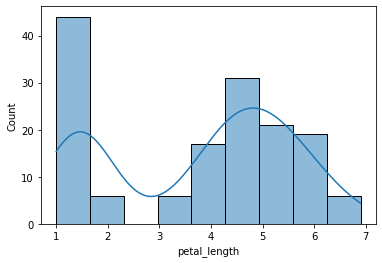

In [19]:
#1 Distribution of petal length
sns.histplot(iris.petal_length, kde=True)

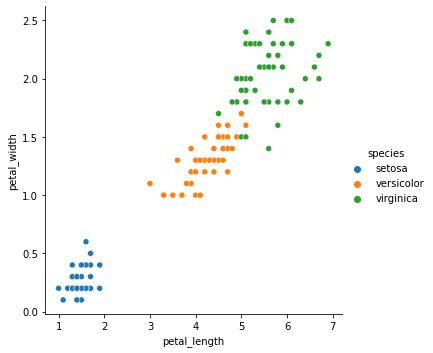

In [20]:
#2 Correlation between petal length and width
sns.relplot(x='petal_length', y='petal_width', hue ='species', data=iris)

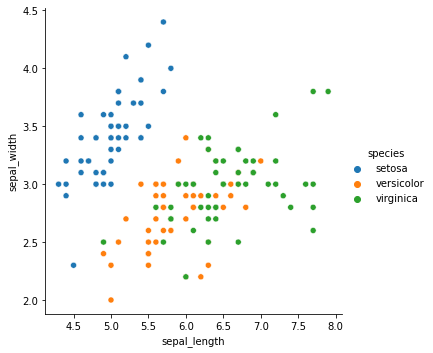

In [21]:
#3 Reasonable to predict species based on sepal width and sepal length?
sns.relplot(data=iris, x='sepal_length', y='sepal_width', hue= 'species')

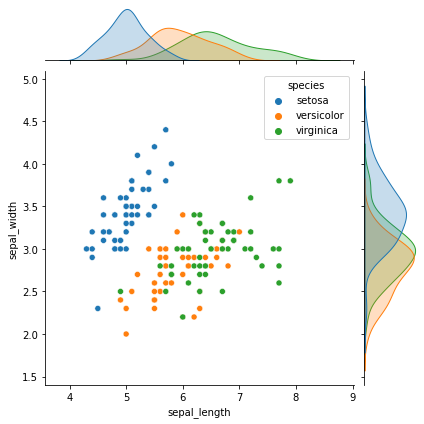

In [22]:
#4 Best at predicting species
sns.jointplot(data=iris, x = 'sepal_length', y = 'sepal_width', hue ='species')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

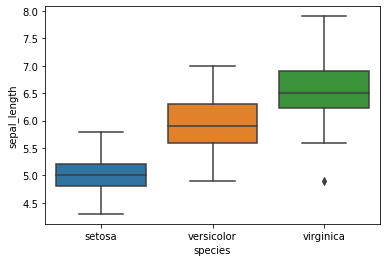

In [23]:
sns.boxplot(x='species', y='sepal_length', data = iris)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

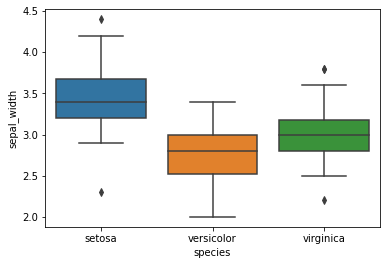

In [24]:
sns.boxplot(x='species', y='sepal_width', data = iris)

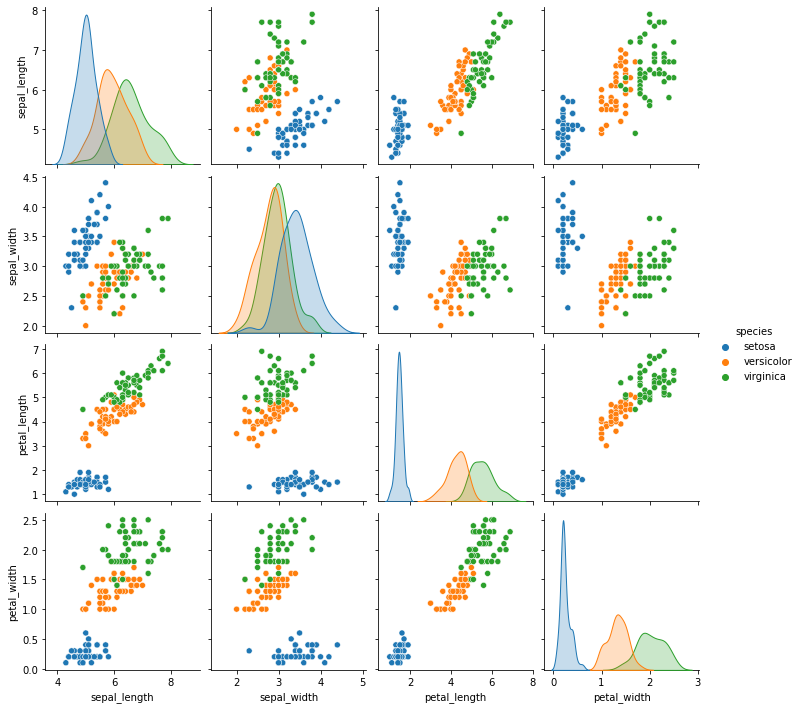

In [156]:
sns.pairplot(data=iris, hue='species')

In [25]:
ctab1 = pd.crosstab(iris.sepal_length, iris.species)
ctab2 = pd.crosstab(iris.sepal_width, iris.species)


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

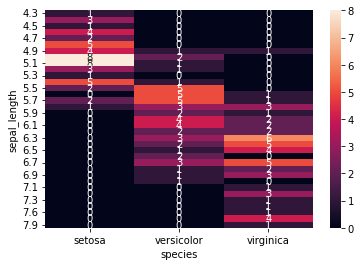

In [26]:
# Maybe just sepal length?
sns.heatmap(ctab1, annot=True)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

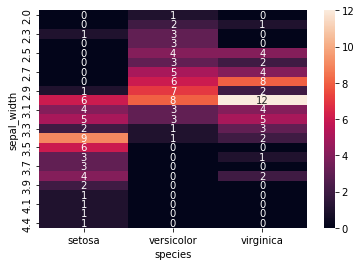

In [27]:
# Or just sepal_width?
sns.heatmap(ctab2, annot = True)

<AxesSubplot:>

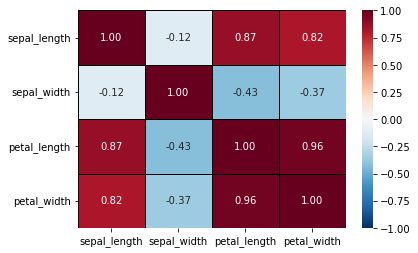

In [46]:
labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sns.heatmap(iris.corr(),
            cmap='RdBu_r',
            vmax = 1,
            vmin = -1,
            center = 0,
            linewidth = 1,
            linecolor = 'k',
            annot = True,
            fmt = '.2f',
           xticklabels = labels, yticklabels = labels)

In [50]:
def max_of_pl(df):
    length = df[(df.species == 'setosa') | (df.species == 'virginica')].petal_length.max()     
    return length


In [51]:
max_of_pl(iris)

6.9

## Section 2

In [38]:
max(iris.petal_length)

6.9

In [87]:
#1 load_dataset and group by dataset column, then calc summary stats
anscombe = sns.load_dataset('anscombe')
anscombe.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [157]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [158]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [92]:
anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [109]:
ans_plots = anscombe.groupby('dataset')
ans_plots.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

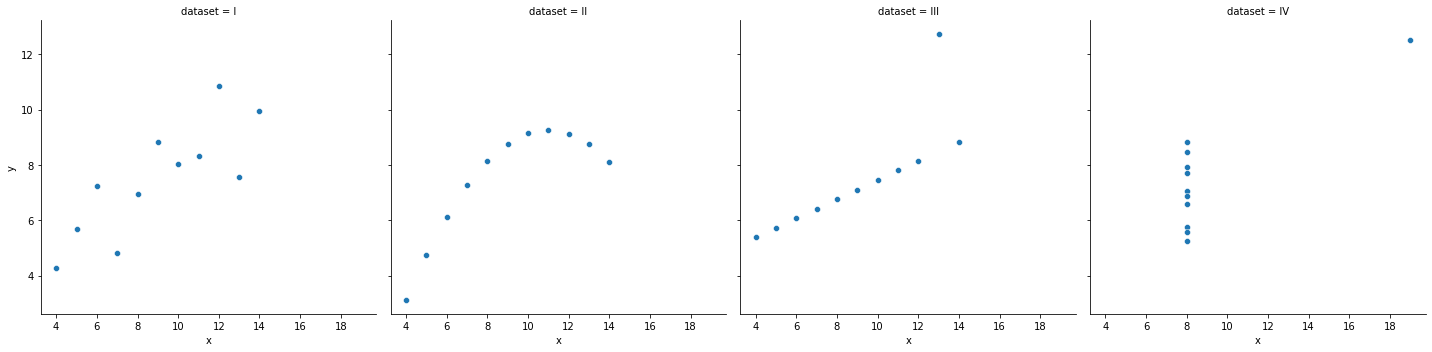

In [99]:
sns.relplot(x='x', y='y', col='dataset', data= anscombe)

In [9]:
sns.lmplot(x='x', y='y', col='dataset', data= anscombe)

NameError: name 'anscombe' is not defined

In [117]:
#2 load InsectSprays and read doc. Create a boxplot that shows
# effectiveness of different sprays

sprays = data('InsectSprays')
sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [122]:
#Pull data from pydataset
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

Text(0.5, 1.0, 'Efficacy of Sprays')

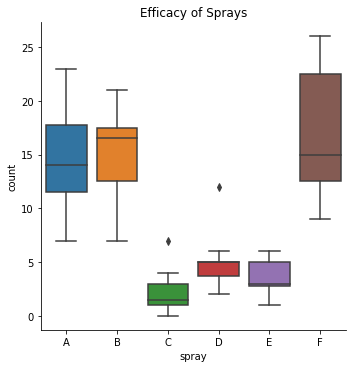

In [160]:
# Create a box plot with counts and sprays. using data from 'spray'
sns.catplot(data=sprays, x='spray', y='count', kind = 'box')
plt.title('Efficacy of Sprays')

In [129]:
#3a Load swiss dataset and read doc.
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [161]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
 6   is_catholic       47 non-null     bool   
dtypes: bool(1), float64(4), int64(2)
memory usage: 3.7+ KB


In [162]:
#3b. Create 'is_catholic' that hold bool that determine region is
# catholic with self-determined cutoff(50%).

swiss['is_catholic'] = swiss.Catholic >50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


In [143]:
ctab = pd.crosstab(swiss.is_catholic, swiss.Fertility)

Text(0.5, 1.0, 'Catholicism and Fertility')

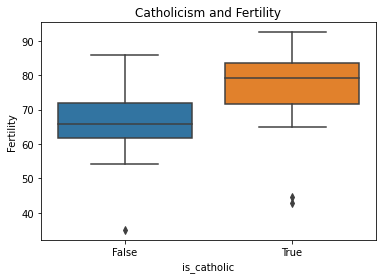

In [164]:
sns.boxplot(x='is_catholic', y='Fertility', data=swiss)
plt.title('Catholicism and Fertility')

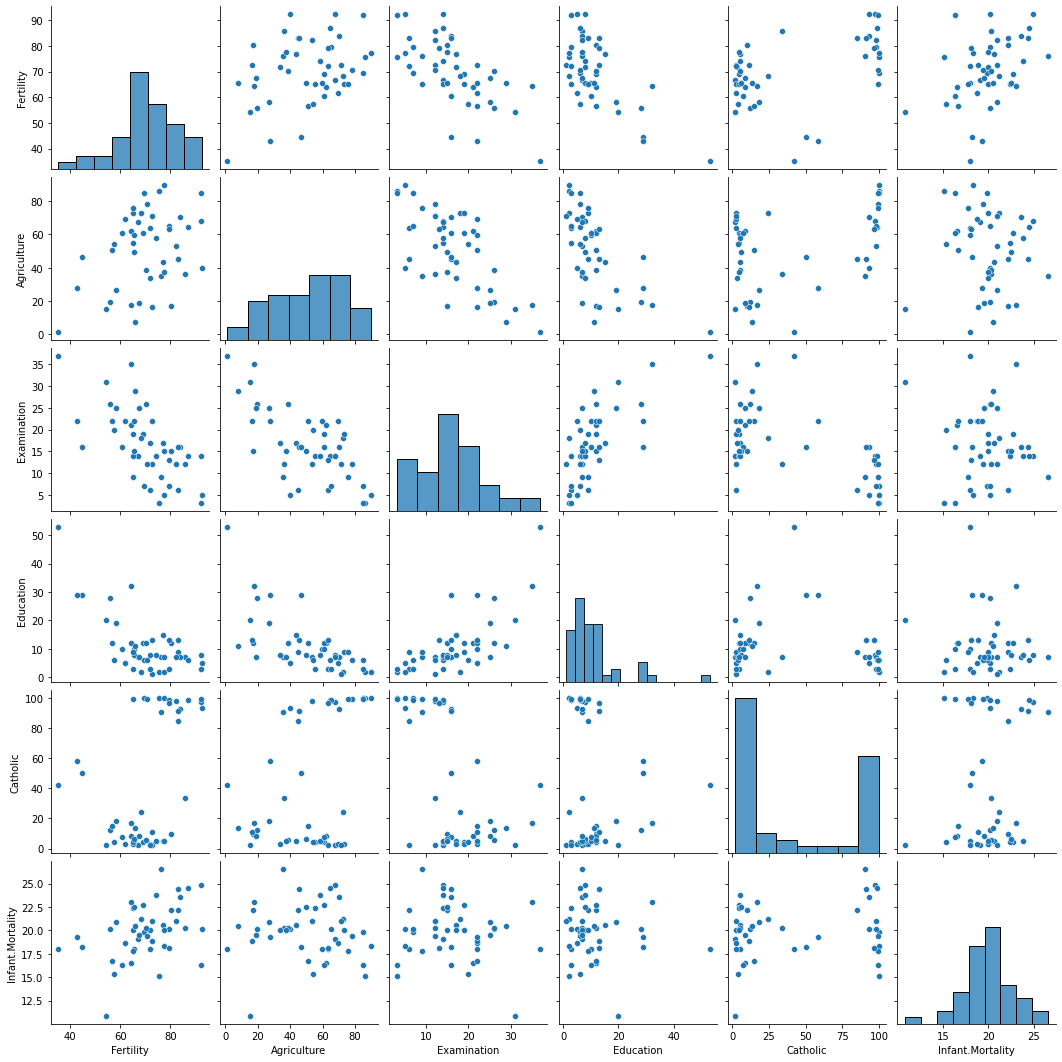

In [167]:
#4 Finding the strongest correlation with Fertility. Drop the columns
# that we don't want.
#swiss.drop(columns= 'is_catholic')
sns.pairplot(data=swiss.iloc[:, :-1])

In [168]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

In [169]:
#4 Chipotle
chipotle_url = get_db_url('chipotle')
chipotle = chipotle_url
chipotle = pd.read_sql('SELECT * FROM orders;', chipotle_url)

In [171]:
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [176]:
best_sellers = orders.groupby('item_name').quantity.sum().nlargest(4)

NameError: name 'order_id' is not defined